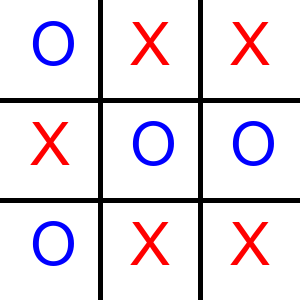

Elapsed time: 16592.68 seconds
It's a draw!
Thanks for playing
-------------------/nGIF saved as 'tic_tac_toe.gif'


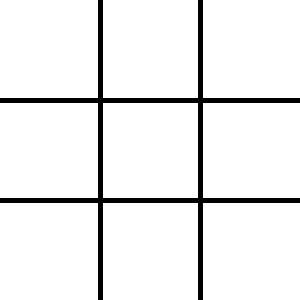

In [5]:
import numpy as np
import time
from PIL import Image, ImageDraw, ImageFont
import imageio
from IPython.display import display, clear_output, Image as IPImage

# Constants for the game
PLAYER = 'X'
AI = 'O'
EMPTY = ' '

# Initialize the game board as a 3x3 matrix
board = np.full((3, 3), EMPTY)

def is_winner(board, player):
    # Check rows, columns, and diagonals for a win
    for row in range(3):
        if all([board[row, col] == player for col in range(3)]):
            return True
    for col in range(3):
        if all([board[row, col] == player for row in range(3)]):
            return True
    if all([board[i, i] == player for i in range(3)]) or all([board[i, 2 - i] == player for i in range(3)]):
        return True
    return False

def is_draw(board):
    # Check for a draw if there are no empty cells and no winner
    return EMPTY not in board and not is_winner(board, PLAYER) and not is_winner(board, AI)

def get_empty_positions(board):
    # Returns a list of empty positions
    return [(i, j) for i in range(3) for j in range(3) if board[i, j] == EMPTY]

def dfs_move(board, player):
    # Depth-First Search move for AI
    empty_positions = get_empty_positions(board)
    if is_winner(board, PLAYER):
        return -1  # Player wins
    if is_winner(board, AI):
        return 1   # AI wins
    if is_draw(board):
        return 0   # Draw

    if player == AI:
        best_score = -float('inf')
        for (i, j) in empty_positions:
            board[i, j] = AI
            score = dfs_move(board, PLAYER)
            board[i, j] = EMPTY
            best_score = max(best_score, score)
        return best_score
    else:
        best_score = float('inf')
        for (i, j) in empty_positions:
            board[i, j] = PLAYER
            score = dfs_move(board, AI)
            board[i, j] = EMPTY
            best_score = min(best_score, score)
        return best_score

def best_ai_move(board):
    # Get the best move for AI using DFS
    best_score = -float('inf')
    best_move = None
    for (i, j) in get_empty_positions(board):
        board[i, j] = AI
        score = dfs_move(board, PLAYER)
        board[i, j] = EMPTY
        if score > best_score:
            best_score = score
            best_move = (i, j)
    return best_move

def draw_board(board):
    # Generate an image of the current board state
    img = Image.new('RGB', (300, 300), color=(255, 255, 255))
    draw = ImageDraw.Draw(img)
    
    try:
        font = ImageFont.truetype("arial.ttf", 60)
    except IOError:
        font = ImageFont.load_default()
    
    # Draw the grid
    for i in range(1, 3):
        draw.line((0, 100 * i, 300, 100 * i), fill=(0, 0, 0), width=5)
        draw.line((100 * i, 0, 100 * i, 300), fill=(0, 0, 0), width=5)
    
    # Draw X and O
    for i in range(3):
        for j in range(3):
            if board[i, j] == PLAYER:
                draw.text((j * 100 + 30, i * 100 + 10), PLAYER, fill=(255, 0, 0), font=font)
            elif board[i, j] == AI:
                draw.text((j * 100 + 30, i * 100 + 10), AI, fill=(0, 0, 255), font=font)
    
    return img

def get_player_move(board):
    # Prompts player for a valid move
    while True:
        try:
            move = input("Enter your move as row and column (e.g., '1 1' for center): ")
            row, col = map(int, move.split())
            if (row in range(3) and col in range(3) and board[row, col] == EMPTY):
                return (row, col)
            else:
                print("Invalid move. Please try again.")
        except ValueError:
            print("Invalid input. Enter row and column as two numbers.")

def play_game():
    images = []  # List to store board states for the GIF
    player_turn = True

    # Start timing the game
    start_time = time.time()
    
    while True:
        # Calculate elapsed time
        elapsed_time = time.time() - start_time

        # Render the current board state and store it in the list
        img = draw_board(board)
        images.append(img)

        # Display the board and elapsed time in the Jupyter notebook
        clear_output(wait=True)
        display(img)
        print(f"Elapsed time: {elapsed_time:.2f} seconds")

        # Check game status
        if is_winner(board, PLAYER):
            print("Player wins!\nThanks for playing")
            break
        elif is_winner(board, AI):
            print("AI wins!\nThanks for playing")
            break
        elif is_draw(board):
            print("It's a draw!\nThanks for playing")
            break

        # Player or AI makes a move
        if player_turn:
            move = get_player_move(board)  # Get the player's move
            board[move] = PLAYER
        else:
            move = best_ai_move(board)
            if move:
                board[move] = AI
        
        # Switch turn
        player_turn = not player_turn

    # Save the entire game as a GIF at the end of the game
    gif_path = 'tic_tac_toe.gif'
    images[0].save(gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)
    print("-------------------/nGIF saved as 'tic_tac_toe.gif'")

    # Display the saved GIF in the notebook
    display(IPImage(filename=gif_path))

# Start the game
play_game()
